In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Comparison of Optimization Procedure

Quick Jupyter Notebook to compare the structures we obtain when performing a geometry optimization with different methods

In [12]:
def parse_atoms(molpro_out):
    """ 
    Parses the atoms with coordinates and symbol from a molpro output file
    """
    with open(molpro_out, 'r') as f:
        lines = f.readlines()
        # Search for Atomic Coordinates in line
        switch = False

        atomic_coordinates = []

        for i, line in enumerate(lines):
            if "Atomic Coordinates" in line:
                switch = True
                continue
            if switch:
                if "Gradient norm" in line:
                    break
                atomic_coordinates.append(line.strip())

        # Remove first entry the header
        atomic_coordinates = list(filter(None, atomic_coordinates))
        # Remove header
        atomic_coordinates = atomic_coordinates[1:]
        
        molecules = {} # Dictionary to hold molecule data
        for atom in atomic_coordinates:
            parts = atom.split()
            # First part is numbering, second part is symbol, fourth fifth and sixth are coordinates
            number = int(parts[0])
            symbol = parts[1]
            atomic_symbol = str(symbol) + str(number)
            x = float(parts[3])
            y = float(parts[4])
            z = float(parts[5])
            coordinates = (x, y, z)
            molecules[atomic_symbol] = coordinates
    return molecules

In [13]:
# Comparison of Optimized Coordinates
# H2O HF 6-311G(d,p), H2O MP2/6-311G(d,p), H2O CCSD/6-311G(d,p), H2O CCSD/VDZ, H2O CCSD/VTZ, H2O CCSD/VQZ

h2o_hf_6311gdp = parse_atoms('/home/lme/overlap_integral_gaussian/molpro_files/h2o/hf/h2o_hf.out')
h2o_mp2_6311gdp = parse_atoms('/home/lme/overlap_integral_gaussian/molpro_files/h2o/mp2/h2o_mp2.out')
h2o_ccsd_6311gdp = parse_atoms('/home/lme/overlap_integral_gaussian/molpro_files/h2o/ccsd/6_311_g_d_p/h2o_ccsd_6311.out')
h2o_ccsd_vdz = parse_atoms('/home/lme/overlap_integral_gaussian/molpro_files/h2o/ccsd/VDZ/h2o_vdz_ccsd.out')
h2o_ccsd_vtz = parse_atoms('/home/lme/overlap_integral_gaussian/molpro_files/h2o/ccsd/VTZ/h2o_vtz_ccsd.out')

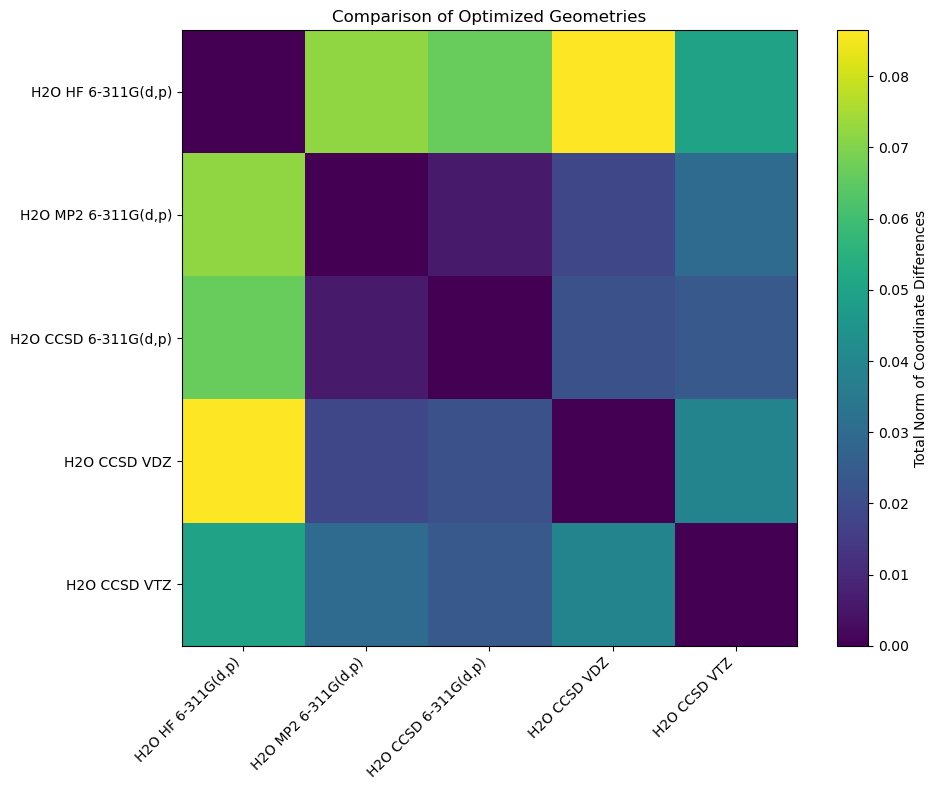

In [15]:
def compare_xyz_positions_total_norm(mol1,mol2):
    """ 
    Compares the xyz positions of two molecules and returns the norm
    """
    coords1 = np.array(list(mol1.values()))
    coords2 = np.array(list(mol2.values()))
    norm = np.linalg.norm(coords1 - coords2)
    return norm

# Compare all combinations and plot in barplot
molecules = {
    'H2O HF 6-311G(d,p)': h2o_hf_6311gdp,
    'H2O MP2 6-311G(d,p)': h2o_mp2_6311gdp,
    'H2O CCSD 6-311G(d,p)': h2o_ccsd_6311gdp,
    'H2O CCSD VDZ': h2o_ccsd_vdz,
    'H2O CCSD VTZ': h2o_ccsd_vtz
}

labels = list(molecules.keys())
n = len(labels)
norms = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if i != j:
            norms[i, j] = compare_xyz_positions_total_norm(molecules[labels[i]], molecules[labels[j]])
        else:
            norms[i, j] = 0.0

# Plotting the norms in a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(norms, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Total Norm of Coordinate Differences')
plt.xticks(range(n), labels, rotation=45, ha='right')
plt.yticks(range(n), labels)
plt.title('Comparison of Optimized Geometries')
plt.tight_layout()
plt.show()



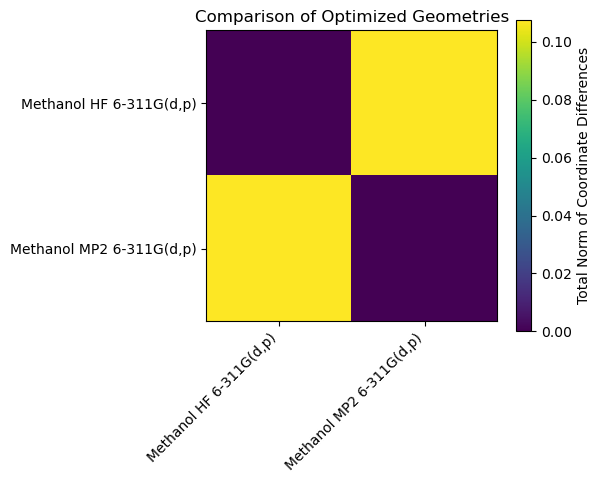

In [17]:
methanol_hf_6311_gdp = parse_atoms('/home/lme/overlap_integral_gaussian/molpro_files/methanol/hf/methanol_hf.out')
methanol_mp2_6311_gdp = parse_atoms('/home/lme/overlap_integral_gaussian/molpro_files/methanol/mp2/methanol_mp2.out')



# Compare all combinations and plot in barplot
molecules = {
    'Methanol HF 6-311G(d,p)': methanol_hf_6311_gdp,
    'Methanol MP2 6-311G(d,p)': methanol_mp2_6311_gdp
}
labels = list(molecules.keys())
n = len(labels)
norms = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if i != j:
            norms[i, j] = compare_xyz_positions_total_norm(molecules[labels[i]], molecules[labels[j]])
        else:
            norms[i, j] = 0.0   


# Plotting the norms in a heatmap
plt.figure(figsize=(6, 5))
plt.imshow(norms, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Total Norm of Coordinate Differences')
plt.xticks(range(n), labels, rotation=45, ha='right')
plt.yticks(range(n), labels)    
plt.title('Comparison of Optimized Geometries')
plt.tight_layout()
plt.show()